## Load package

In [6]:
%matplotlib notebook
from pyScatt.packages import * # this package is for load dat from BNL lab
T = True
F = False 

## Define IO #finding and selecting data

In [12]:
# inDir1 = '/home/wliu1/Data/OER/2024-3-26/'
inDir = '/home/wliu1/Data/OER/2024-4-1/'





outDir = '/home/wliu1/Results/'
outDir = create_fullpath( outDir + 'OER/')

Directory  /home/wliu1/Results/OER/  already exists


## find the interested data

In [30]:
%run -i ../Codes/IO1.py


import numpy as np


def load_data_with_header(filename,data_row_start=59, return_data_header=False,):
    fin = open( filename, 'rb' )    
    p=fin.readlines()
    for i, line in enumerate(p):        
        if data_row_start!=0:
            if i==0:
                els = line.split()
                tem=np.array(els, dtype= object )              
                data_header=tem 
        if i==data_row_start:
            els = line.split()
            tem=np.array(els, dtype=float)              
            data=tem    
        if i>data_row_start:
            els = line.split()
            tem=np.array(els, dtype=float)
            data=np.vstack( (data,tem))  
       
            
    fin.close()        
    if not return_data_header:
        return data 
    else:
        return data,data_header    

def load_LSV( filename, data_row_start= 62, ):    
    if 'LSV' in filename:
        
        D = load_data_with_header( filename, data_row_start= data_row_start, return_data_header=False)
        V = D[:,6]
        I = D[:,7]
        return V, I 
    else:
        print('Please give a LSV file.')
        return None, None


def plot1D(x, y, ax, m='o', ls='', c='blue', markersize=1, logx=False, logy=False, label=None, legend_size=6, title='', alpha=0.5):
    if label is not None:
        ax.plot(x, y, marker=m, linestyle=ls, color=c, markersize=markersize, alpha=alpha, label=label)
    else:
        ax.plot(x, y, marker=m, linestyle=ls, color=c, markersize=markersize, alpha=alpha)

    if logx:
        ax.set_xscale('log')
    if logy:
        ax.set_yscale('log')

    ax.set_title(title)
    plt.tight_layout()

In [16]:
fps = np.array( ls_dir( inDir, and_list = ['mpt'] ) )
print( fps )

['2024040100_01_OCV_C01.mpt' '2024040103_03_CV_C01.mpt'
 '2024040100_02_CV_C01.mpt' '2024040100_03_CV_C01.mpt'
 '2024040100_04_LSV_C01.mpt' '2024040100_05_ZIR_C01.mpt'
 '2024040100_06_LSV_C01.mpt' '2024040100_07_PEIS_C01.mpt'
 '2024040101_01_OCV_C01.mpt' '2024040103_04_LSV_C01.mpt'
 '2024040101_02_CV_C01.mpt' '2024040103_05_ZIR_C01.mpt'
 '2024040101_03_CV_C01.mpt' '2024040101_04_LSV_C01.mpt'
 '2024040101_05_ZIR_C01.mpt' '2024040101_06_LSV_C01.mpt'
 '2024040102_01_OCV_C01.mpt' '2024040102_02_CV_C01.mpt'
 '2024040104_05_ZIR_C01.mpt' '2024040102_03_CV_C01.mpt'
 '2024040102_04_LSV_C01.mpt' '2024040102_05_ZIR_C01.mpt'
 '2024040102_06_LSV_C01.mpt' '2024040103_01_OCV_C01.mpt'
 '2024040104_06_LSV_C01.mpt' '2024040103_02_CV_C01.mpt'
 '2024040103_06_LSV_C01.mpt' '2024040104_01_OCV_C01.mpt'
 '2024040104_02_CV_C01.mpt' '2024040104_03_CV_C01.mpt'
 '2024040104_04_LSV_C01.mpt' '2024040105_01_OCV_C01.mpt'
 '2024040109_02_CV_C01.mpt' '2024040105_02_CV_C01.mpt'
 '2024040109_03_CV_C01.mpt' '2024040105_03

In [18]:
filtered_fps = [fp for fp in fps if "06_LSV" in fp]
N = len(filtered_fps)
print(filtered_fps)


['2024040100_06_LSV_C01.mpt', '2024040101_06_LSV_C01.mpt', '2024040102_06_LSV_C01.mpt', '2024040104_06_LSV_C01.mpt', '2024040103_06_LSV_C01.mpt', '2024040105_06_LSV_C01.mpt', '2024040106_06_LSV_C01.mpt', '2024040107_06_LSV_C01.mpt', '2024040109_06_LSV_C01.mpt', '2024040108_06_LSV_C01.mpt', '2024040110_06_LSV_C01.mpt', '2024040113_06_LSV_C01.mpt', '2024040111_06_LSV_C01.mpt', '2024040112_06_LSV_C01.mpt', '2024040114_06_LSV_C01.mpt', '2024040117_06_LSV_C01.mpt', '2024040115_06_LSV_C01.mpt', '2024040116_06_LSV_C01.mpt', '2024040118_06_LSV_C01.mpt', '2024040119_06_LSV_C01.mpt', '2024040120_06_LSV_C01.mpt', '2024040121_06_LSV_C01.mpt', 'TiN_06_LSV_C01.mpt']


<IPython.core.display.Javascript object>


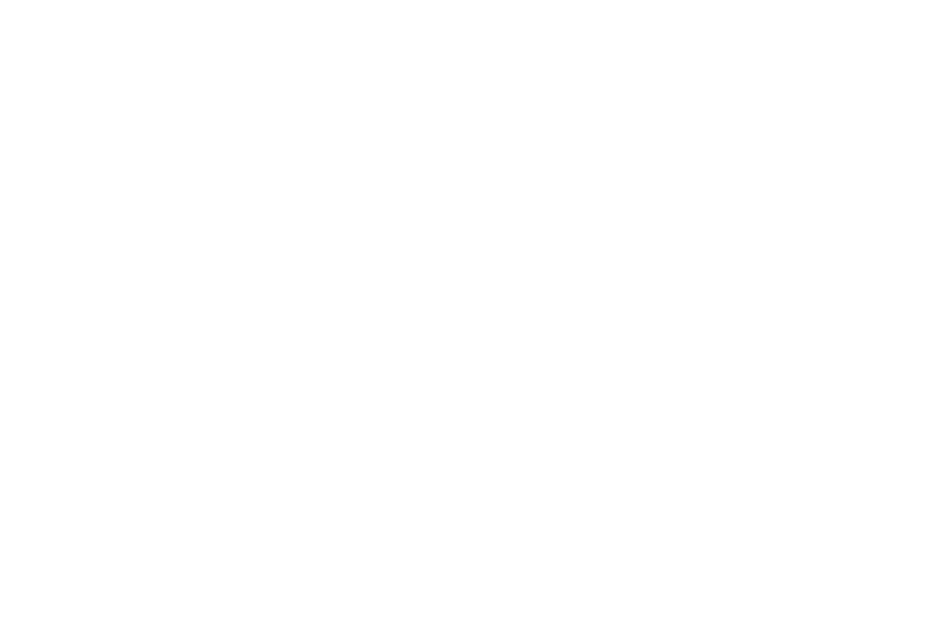

In [31]:

name_to_label_mapping = {

    '2024040105': '20 ug/cm2 Commerical IrO2',
    '2024040106': '10 ug/cm2 Commerical IrO2',
    '2024040107': '24 ug/cm2 Commerical IrO2',
    '2024040108': '60 ug/cm2 Commerical IrO2',
    '2024040109': '30 ug/cm2 Commerical IrO2',
    '2024040110': '30 ug/cm2 Commerical IrO2',
    '2024040111': '15 ug/cm2 Commerical IrO2',
    '2024040112': '10 ug/cm2 Commerical IrO2',
    '2024040113': '20 ug/cm2 Commerical IrO2',
    '2024040114': 'B0+400 °C in air',
    '2024040115': 'B0+400 °C in N2',
    '2024040116': 'B0',
    '2024040117': 'B0+400 °C in N2',
    '2024040118': 'B0+600 °C in N2',
    '2024040119': 'B0+800 °C in N2',
    '2024040120': 'B0+200 °C in N2',
    '2024040121': 'B0+200 °C in air',
    '2024040122': 'IrO2 @ TiN',
    'TiN': 'TiN'
}


fig = plt.figure( figsize=[6,4] )
ax = fig.add_subplot(111)
j = 0 
for fp in filtered_fps[5:]:
    x, y = load_LSV(inDir + fp)
    x += 0.257
    
   
    legend_label = fp.split('_')[0]  
    legend_label = name_to_label_mapping.get(legend_label, 'Unknown')

    plot1D(x=x, y=y, ax=ax, m='o', ls='-', c=colors[j], markersize=1,  
           logx=False, logy=False, legend=legend_label, legend_size=6, title='', alpha=.5)
    j += 1

ax.set_xlim(0.973 + 0.257, 1.5 + .257)
ax.set_xlabel('Potential(v)')
ax.set_ylabel('Current(mA)')
plt.savefig(outDir + 'test.png', dpi=200)


<IPython.core.display.Javascript object>


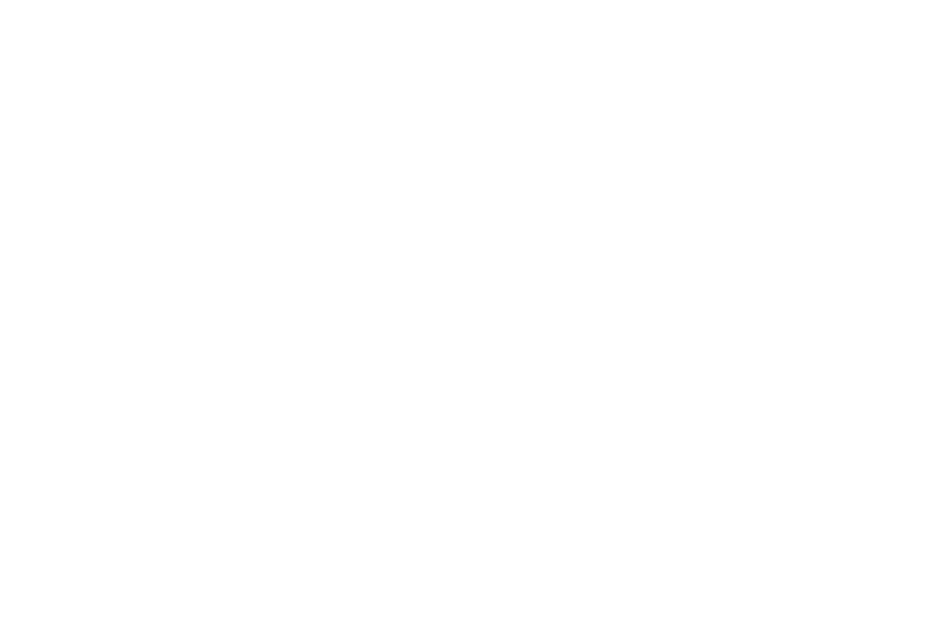

In [32]:
selected_indices =  [  9,10,11,12,13, 14,15,16,17,18,19,20,21  ] 
fig = plt.figure(figsize=[6,4])
ax = fig.add_subplot(111)
j = 0

for j in selected_indices:
    fp = filtered_fps[j] 
    
    x, y = load_LSV(inDir + fp)
    x += 0.253
    y=y/0.196
   
    legend_label = fp.split('_')[0]  
    legend_label = name_to_label_mapping.get(legend_label, 'Unknown')

    plot1D(x=x, y=y, ax=ax, m='o', ls='-', c=colors[j+1], markersize=1,  
           logx=False, logy=False, legend=legend_label, legend_size=8, title='', alpha=.5)
    j += 1

ax.set_xlim(0.973 + 0.253,  1.5 + .257)
# ax.set_xlim( 1.23, 1.65)

ax.set_xlim( 1.4, 1.65)


ax.set_ylim( -10, 70)
ax.set_xlabel('Potential(v) - RHE')
ax.set_ylabel('Current(mA)/cm2')
plt.savefig(outDir + 'test.png', dpi=200)

<IPython.core.display.Javascript object>


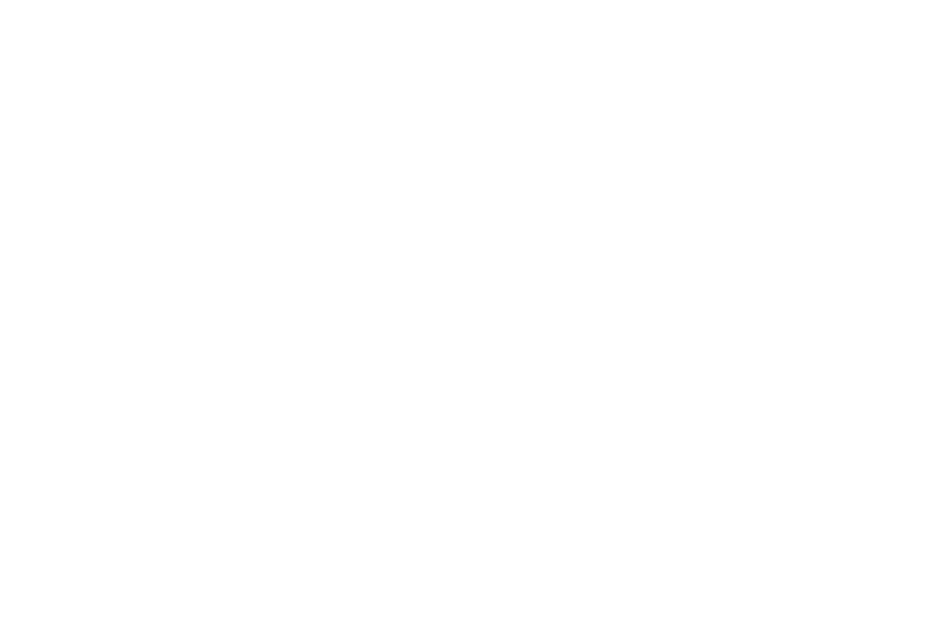

In [66]:
selected_indices = [  9,10,11,12]  
fig = plt.figure(figsize=[6,4])
ax = fig.add_subplot(111)
j = 0

for j in selected_indices:
    fp = filtered_fps[j] 
    
    x, y = load_LSV(inDir + fp)
    x += 0.257
    y=y/0.196
   
    legend_label = fp.split('_')[0]  
    legend_label = name_to_label_mapping.get(legend_label, 'Unknown')
    if j==11:
        plot1D(x=x, y=y, ax=ax, m='o', ls='-', c='black', markersize=1,  
           logx=False, logy=False, legend=legend_label, legend_size=8, title='', alpha=.5)
    else:
        plot1D(x=x, y=y, ax=ax, m='o', ls='-', c=colors[j+1], markersize=1,  
           logx=False, logy=False, legend=legend_label, legend_size=8, title='', alpha=.5)
    j += 1

ax.set_xlim(0.973 + 0.257,  1.5 + .257)
# ax.set_xlim( 1.23, 1.65)

ax.set_xlim( 1.4, 1.65)


ax.set_ylim( -10, 70)
ax.set_xlabel('Potential(v) - RHE')
ax.set_ylabel('Current(mA)/cm2')
plt.savefig(outDir + 'test.png', dpi=200)

In [74]:
import numpy as np
from scipy.interpolate import interp1d
categories = []
current_density_at_1_54V = [] 
potential_at_10_mA_cm2 = []  

def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx

selected_indices = [  9,10,11,12 ] 
for j in selected_indices:
    fp = filtered_fps[j]
    x, y = load_LSV(inDir + fp) 
    x += 0.257 
    y = y / 0.196  
    
    # Interpolating the y-value at x = 1.54 V
    f_interp_y = interp1d(x, y, kind='linear', fill_value='extrapolate')
    y_at_1_54 = f_interp_y(1.54)
    
    # Interpolating the x-value at y = 10 mA/cm²
    f_interp_x = interp1d(y, x, kind='linear', fill_value='extrapolate')
    x_at_10_mA = (f_interp_x(10)-1.23)*1000

    # Get the label for the current dataset
    legend_label = name_to_label_mapping.get(fp.split('_')[0], 'Unknown')
    weight_str = legend_label.split(' ')[0]
    weight = float(weight_str)
    y_at_1_54 = f_interp_y(1.54)/weight*1000
   
    categories.append(legend_label.split(' ')[0]+legend_label.split(' ')[1])
    current_density_at_1_54V.append(y_at_1_54)
    potential_at_10_mA_cm2.append(x_at_10_mA)

    print(f"{legend_label}: Current density at 1.54V is {y_at_1_54} mA/cm²")
    print(f"{legend_label}: Potential at 10 mA/cm² is {x_at_10_mA} mV")


60 ug/cm2 Commerical IrO2: Current density at 1.54V is 94.78371476426273 mA/cm²
60 ug/cm2 Commerical IrO2: Potential at 10 mA/cm² is 327.80993407725845 mV
30 ug/cm2 Commerical IrO2: Current density at 1.54V is 98.41293518655202 mA/cm²
30 ug/cm2 Commerical IrO2: Potential at 10 mA/cm² is 359.76233567131555 mV
20 ug/cm2 Commerical IrO2: Current density at 1.54V is 86.06686928746242 mA/cm²
20 ug/cm2 Commerical IrO2: Potential at 10 mA/cm² is 376.9207288289285 mV
15 ug/cm2 Commerical IrO2: Current density at 1.54V is 39.48020974861674 mA/cm²
15 ug/cm2 Commerical IrO2: Potential at 10 mA/cm² is 430.916325333436 mV


<IPython.core.display.Javascript object>


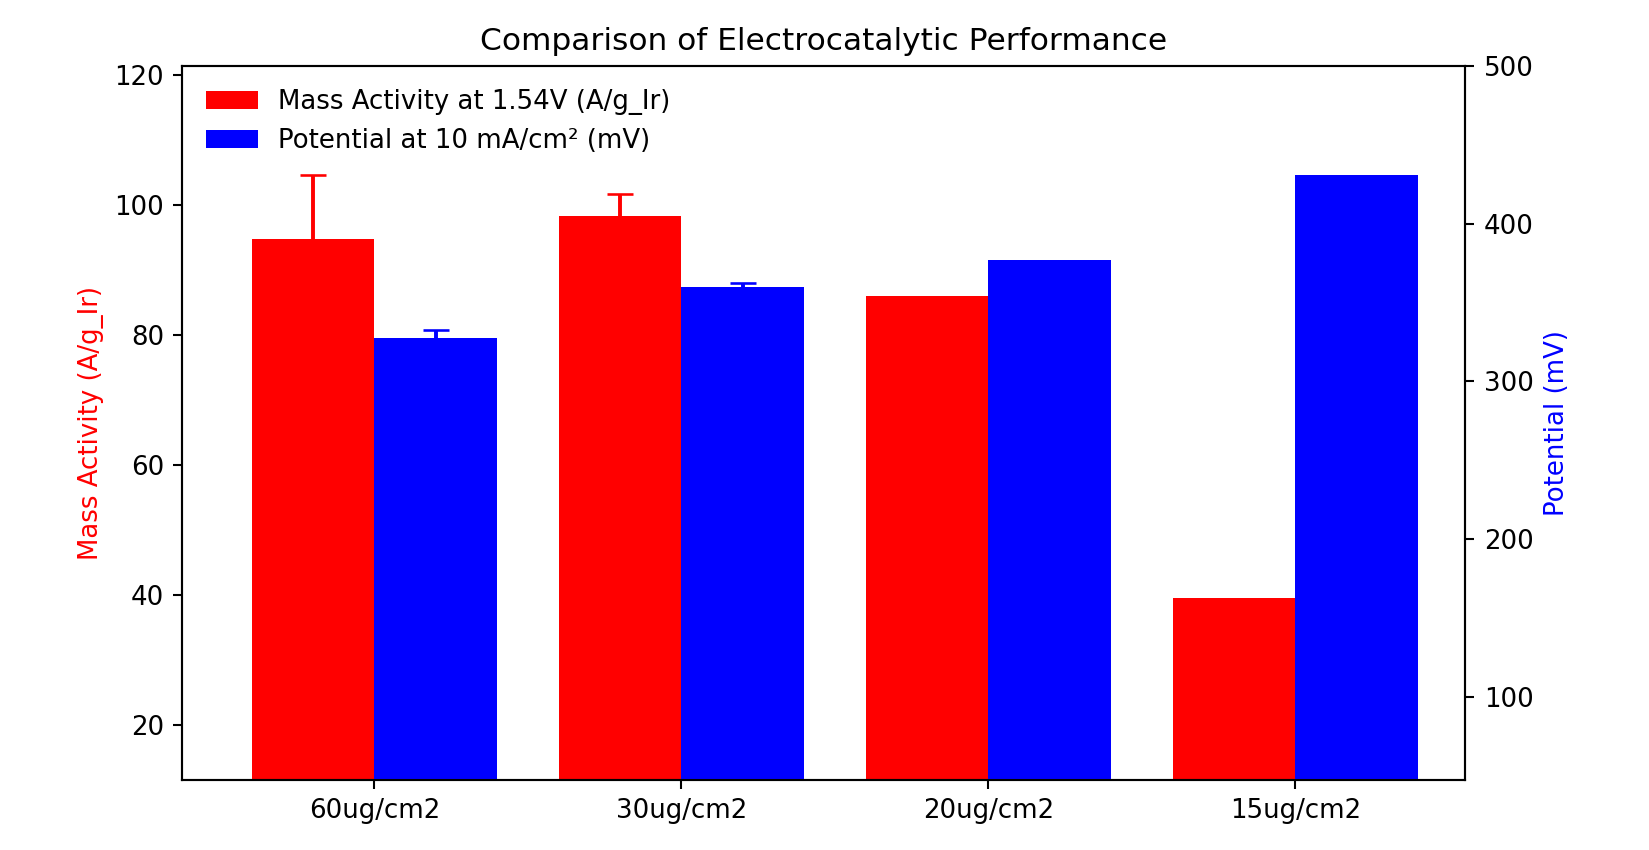

In [75]:


fig, ax1 = plt.subplots()

bars1 = ax1.bar(np.arange(len(categories)) - 0.2, current_density_at_1_54V, width=0.4, color='red', label='Mass Activity at 1.54V (A/g_Ir)')




ax2 = ax1.twinx()
bars2 = ax2.bar(np.arange(len(categories)) + 0.2, potential_at_10_mA_cm2, width=0.4, color='blue', label='Potential at 10 mA/cm² (mV)')

ax1.set_ylabel('Mass Activity (A/g_Ir)', color='red')
ax2.set_ylabel('Potential (mV)', color='blue')

ax1.set_xticks(np.arange(len(categories)))
ax1.set_xticklabels(categories)

ax1.set_title('Comparison of Electrocatalytic Performance')
# ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles + handles2, labels + labels2, loc='upper left', frameon=False)
###error bars
S60ug = np.array([ 94.78, 75 ])
S60ug.mean(), S60ug.std()
S30ug = np.array([ 91.78, 98.41])
S30ug.mean(), S30ug.std()
errors = np.array( [ 9.89, 3.31,0,0] ) * 1

ax1.errorbar(np.arange(2) - 0.2, current_density_at_1_54V[:2], yerr=errors[:2], fmt='none', color='red', capsize=5)
errors2 = np.array( [ 4.6, 2.65,0,0 ] ) * 1
ax2.errorbar(np.arange(2) + 0.2,  potential_at_10_mA_cm2[:2], yerr=errors2[:2], fmt='none', color='blue', capsize=5)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='large')
# Add data labels on top of the bars
# for bar in bars1:
#     yval = bar.get_height()
#     ax1.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom')

# for bar in bars2:
#     yval = bar.get_height()
#     ax1.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom', color='blue')

plt.tight_layout()
plt.savefig('chart_with_legend.png', bbox_inches='tight')

plt.show()


In [69]:
import numpy as np
from scipy.interpolate import interp1d
categories = []
current_density_at_1_54V = [] 
potential_at_10_mA_cm2 = []  

def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx

selected_indices = [ 11,15,18,19,20 ] 
for j in selected_indices:
    fp = filtered_fps[j]
    x, y = load_LSV(inDir + fp) 
    x += 0.257 
    y = y / 0.196  
    
    # Interpolating the y-value at x = 1.54 V
    f_interp_y = interp1d(x, y, kind='linear', fill_value='extrapolate')
    y_at_1_54 = f_interp_y(1.54)
    
    # Interpolating the x-value at y = 10 mA/cm²
    f_interp_x = interp1d(y, x, kind='linear', fill_value='extrapolate')
    x_at_10_mA = (f_interp_x(10)-1.23)*1000

    # Get the label for the current dataset
    legend_label = name_to_label_mapping.get(fp.split('_')[0], 'Unknown')
#     weight_str = legend_label.split(' ')[0]
#     weight = float(weight_str)
    weight = 20
    y_at_1_54 = f_interp_y(1.54)/weight*1000
   
    categories.append(legend_label.split(' ')[0]+legend_label.split(' ')[1]+' ' + legend_label.split(' ')[2]+legend_label.split(' ')[3])
    current_density_at_1_54V.append(y_at_1_54)
    potential_at_10_mA_cm2.append(x_at_10_mA)

    print(f"{legend_label}: Current density at 1.54V is {y_at_1_54} mA/cm²")
    print(f"{legend_label}: Potential at 10 mA/cm² is {x_at_10_mA} mV")

20 ug/cm2 Commerical IrO2: Current density at 1.54V is 86.06686928746242 mA/cm²
20 ug/cm2 Commerical IrO2: Potential at 10 mA/cm² is 376.9207288289285 mV
B0+400 °C in N2: Current density at 1.54V is 68.59586187812997 mA/cm²
B0+400 °C in N2: Potential at 10 mA/cm² is 407.78107759564386 mV
B0+600 °C in N2: Current density at 1.54V is 195.8827018665768 mA/cm²
B0+600 °C in N2: Potential at 10 mA/cm² is 354.02275491825174 mV
B0+800 °C in N2: Current density at 1.54V is 249.38975104216223 mA/cm²
B0+800 °C in N2: Potential at 10 mA/cm² is 343.98700125289093 mV
B0+200 °C in N2: Current density at 1.54V is 18.787154471511506 mA/cm²
B0+200 °C in N2: Potential at 10 mA/cm² is 657.3818749942116 mV


<IPython.core.display.Javascript object>


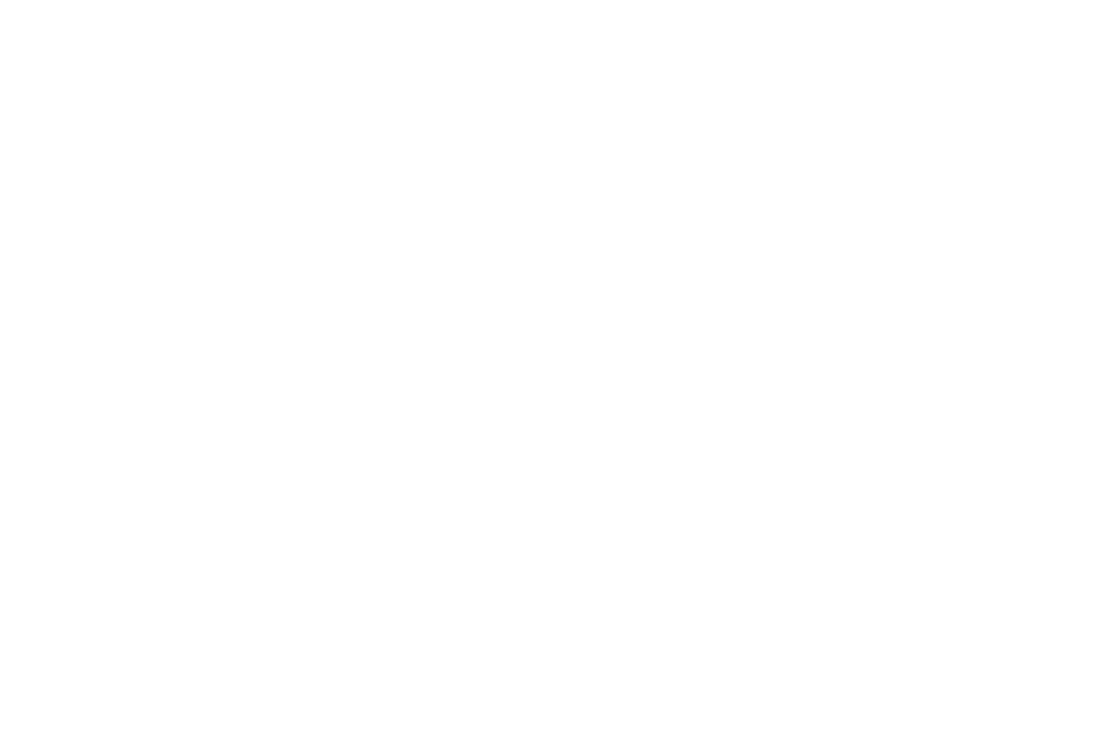

In [70]:


fig, ax1 = plt.subplots()

# Create bar chart for the current density at 1.54V
bars1 = ax1.bar(np.arange(len(categories)) - 0.2, current_density_at_1_54V, width=0.4, color='red', label='Current Density at 1.54V (mA/cm²)')

# Create a second y-axis for potential at 10 mA/cm²
ax2 = ax1.twinx()
bars2 = ax2.bar(np.arange(len(categories)) + 0.2, potential_at_10_mA_cm2, width=0.4, color='blue', label='Potential at 10 mA/cm² (mV)')

# Set the y-axis labels
ax1.set_ylabel('Current Density (mA/cm²)', color='red')
ax2.set_ylabel('Potential (mV)', color='blue')

# Set the labels for the x-ticks
ax1.set_xticks(np.arange(len(categories)))
ax1.set_xticklabels(categories, rotation=8,size=7)

# Set title and legend
ax1.set_title('Comparison of Electrocatalytic Performance')
# ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles + handles2, labels + labels2, loc='upper left', frameon=False)
# Show the plot
plt.show()

# Tafel Fitting and Plot

In [78]:
def get_Voffset( pH ):
    return 0.1976 + pH * 0.05962

def get_Tafel( x, y ):
    return np.log( np.abs(y) ), x 
    

<IPython.core.display.Javascript object>


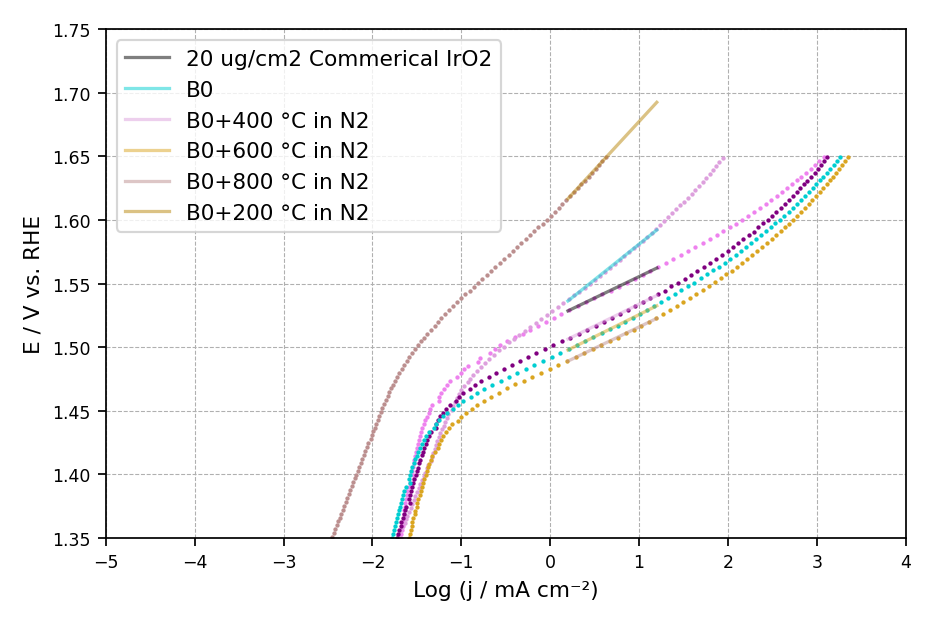

20 ug/cm2 Commerical IrO2
11 -- Slope=33.69--Intercept=1.522
B0
17 -- Slope=55.84--Intercept=1.525
B0+400 °C in N2
16 -- Slope=34.32--Intercept=1.499
B0+600 °C in N2
18 -- Slope=34.78--Intercept=1.491
B0+800 °C in N2
19 -- Slope=33.63--Intercept=1.482
B0+200 °C in N2
20 -- Slope=75.86--Intercept=1.602


In [85]:
selected_indices =  [ 11,17,16,18,19,20 ]   
fig = plt.figure(figsize=[6,4])
ax = fig.add_subplot(111)
j = 1
for j in selected_indices:
    fp = filtered_fps[j] 
    x, y = load_LSV(inDir + fp)
#     ind = find_index(x, 1.23)    
#     y = y - y[ind]
    x += 0.257
    y=y/0.196
    file_code = fp.split('_')[0]
    legend_label = fp.split('_')[0]  
    legend_label = name_to_label_mapping.get(legend_label, 'Unknown')
    print( legend_label)
#     if j ==0:
#         y -= 0.048
#     if j ==7:
#         y*=1
#     ind = find_index(x, 1.23)    
# #     y = y - y[ind]
#     y = y *1e-3/ (mass_dict[ j ] * 1e-6)
    
    x1, y1 = get_Tafel( x, y )
    w = ( x1<8 ) & (x1>-5) & ( y1<1.65 ) & (y1>1.3 )
    x1, y1  = x1[w], y1[w]
    
    if j in [0, 13]  :
        xf1, xf2 = -0.8, 1.2 #0.1, 1
    else:
        xf1, xf2 = 0.2, 1.2
    d0, gf = linear_fit( x1, y1,  [ xf1, xf2  ]) 
    print( '%s -- Slope=%.2f--Intercept=%.3f'%(j, d0[0]*1000, d0[1] ) ) 
    
    plot1D(x=x1, y=y1, ax=ax, m='o', ls='', c=colors[j], markersize=1,  
       logx=False, logy=False, label='_nolegend_',legend='_nolegend_')
    #j += 1
    x1f = np.linspace( xf1, xf2,100)
    if j==11:
            plot1D(x=x1f, y= gf(x1f), ax=ax, m='', ls='-', c='black', markersize=1,  
       logx=False, logy=False, legend=legend_label, legend_size=6, title='', alpha=.5)  
    else:
        plot1D(x=x1f, y= gf(x1f), ax=ax, m='', ls='-', c=colors[j+1], markersize=1,  
       logx=False, logy=False, legend=legend_label, legend_size=6, title='', alpha=.5)   
 
    
# Setting the axis labels
plt.xlabel('Log (j / mA cm⁻²)')
plt.ylabel('E / V vs. RHE')

# Set the x and y limits of the plot
plt.xlim([-5.0, 4])
plt.ylim([1.35, 1.75])

# Adding a legend
plt.legend()

# Show grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
# plt.tight_layout()
plt.show()


#ax.set_xlabel('Potential(v) - RHE')
#ax.set_ylabel('Current(A)/Ir_g')
plt.savefig(outDir + 'test.png', dpi=200)

<IPython.core.display.Javascript object>


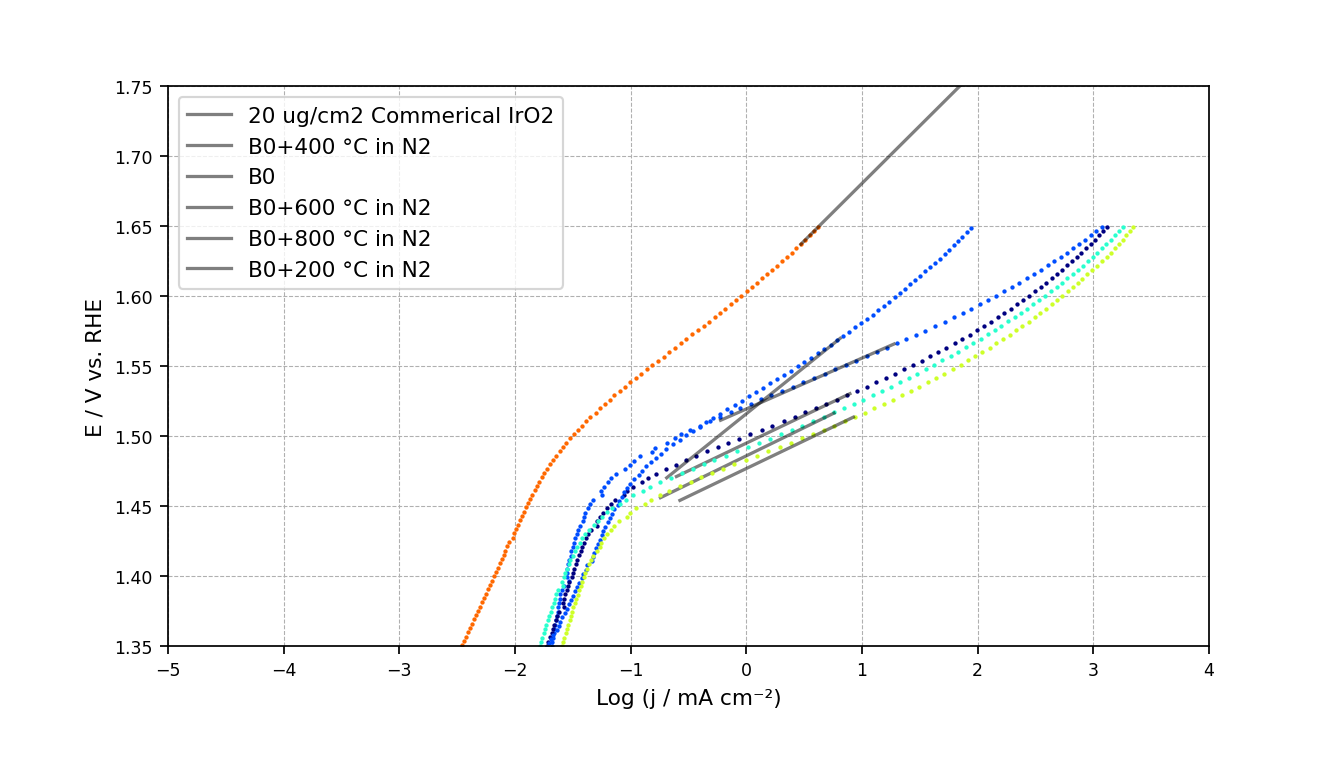

20 ug/cm2 Commerical IrO2
Slope=33.83 -- Intercept=1.522 -- R²=1.000
B0+400 °C in N2
Slope=32.95 -- Intercept=1.500 -- R²=1.000
B0
Slope=51.61 -- Intercept=1.527 -- R²=1.000
B0+600 °C in N2
Slope=32.72 -- Intercept=1.492 -- R²=1.000
B0+800 °C in N2
Slope=32.08 -- Intercept=1.483 -- R²=1.000
B0+200 °C in N2
Slope=82.24 -- Intercept=1.598 -- R²=1.000


In [124]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming `load_LSV`, `get_Tafel`, `linear_fit`, `plot1D` and other necessary functions are defined elsewhere.

def find_best_fit_range(x, y, x_start=-1, x_end=2, window_width=1.5):
    """
    Find the best linear fit range within the specified x-axis boundaries with the highest R-squared value.
    """
    best_fit = {'slope': 0, 'intercept': 0, 'r_value': 0, 'x_range': (0, 0), 'fit_func': None}
    for start in np.linspace(x_start, x_end - window_width, num=500):
        end = start + window_width
        mask = (x >= start) & (x <= end)
        if np.sum(mask) > 2:  # Ensure there are at least two points to perform regression
            slope, intercept, r_value, p_value, std_err = linregress(x[mask], y[mask])
            if r_value**2 > best_fit['r_value']:
                best_fit = {
                    'slope': slope, 'intercept': intercept, 'r_value': r_value**2,
                    'x_range': (start, end),
                    'fit_func': lambda x: intercept + slope * x
                }
    return best_fit

fig = plt.figure(figsize=[6,4])
ax = fig.add_subplot(111)

for j in selected_indices:
    fp = filtered_fps[j] 
    x, y = load_LSV(inDir + fp)
    x += 0.257
    y = y / 0.196
    file_code = fp.split('_')[0]
    legend_label = name_to_label_mapping.get(file_code, 'Unknown')
    print(legend_label)
    x1, y1 = get_Tafel(x, y)
    w = (x1 < 8) & (x1 > -5) & (y1 < 1.65) & (y1 > 1.3)
    x1, y1 = x1[w], y1[w]

    # Automatically find the best fit range
    best_fit = find_best_fit_range(x1, y1)

    # Plot the data and the best fit line
    plot1D(x=x1, y=y1, ax=ax, m='o', ls='', c=colors[j-16], markersize=1, label='_nolegend_',legend='_nolegend_')
    x1f = np.linspace(best_fit['x_range'][0], best_fit['x_range'][1], 100)
    plot1D(x=x1f, y=best_fit['fit_func'](x1f), ax=ax, m='', ls='-', c='black', markersize=1, legend=legend_label, legend_size=6, title='', alpha=.5)
   
    print(f'Slope={best_fit["slope"]*1000:.2f} -- Intercept={best_fit["intercept"]:.3f} -- R²={best_fit["r_value"]:.3f}')

# Finalize the plot
plt.xlabel('Log (j / mA cm⁻²)')
plt.ylabel('E / V vs. RHE')
plt.xlim([-5.0, 4])
plt.ylim([1.35, 1.75])
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
plt.savefig(outDir + 'test.png', dpi=200)
